In [1]:
import platform
import os
from pathlib import Path
from pprint import pprint

if platform.system() == 'Linux':  # if on Colab
    print('Mounting google drive...')
    from google.colab import drive
    drive.mount('/content/drive')
    %cd "/content/drive/My Drive"
    %cd "brenner_swenson_computer_vision/src"
    !pip install opencv-python==4.4.0.46
    !pip install scikit-learn==0.24.1
    # dynamically get full file paths regardless of environment
    PROJECT_DIR = Path(os.path.dirname(os.path.abspath(''))).absolute()
    DATASET_DIR = str(PROJECT_DIR.joinpath("cw_dataset"))
    VIDEOS_DIR = str(PROJECT_DIR.joinpath("video"))

else:
    try:
        os.chdir('src/')
        PROJECT_DIR = Path(os.path.dirname(os.path.abspath(''))).parent.absolute()
        DATASET_DIR = str(PROJECT_DIR.joinpath("cw_dataset"))
        VIDEOS_DIR = str(PROJECT_DIR.joinpath("video"))
    except:
        print("Error changing directories")
        pass

import test as test



Mounting google drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/brenner_swenson_computer_vision/src


INFO:test:Making predictions on test data
INFO:test:Loading test data
INFO:utils:Successfully loaded 3068 images
INFO:utils:Beginning clustering process for 3065 images
100%|██████████| 3065/3065 [00:03<00:00, 1009.85it/s]
INFO:utils:Successfully loaded 3068 images
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


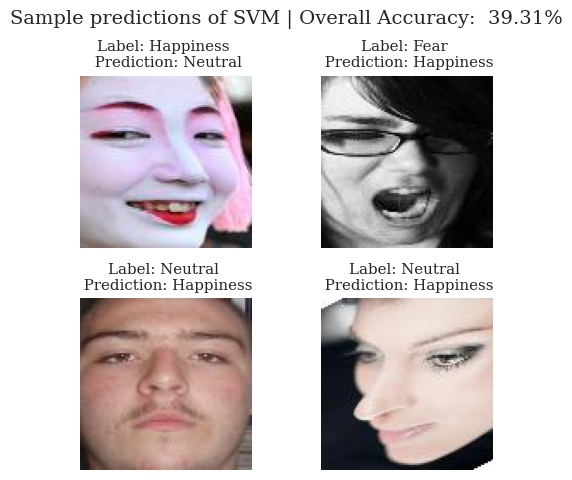

{'accuracy': 39.3089960886571,
 'f1_score': 0.27580549165383156,
 'precision': 0.31274118638771925,
 'recall': 0.39308996088657105}


In [2]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="SVM")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test HOG-MLP

INFO:test:Making predictions on test data
INFO:test:Loading test data
INFO:utils:test DataLoader using 5 workers for 3068 images
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


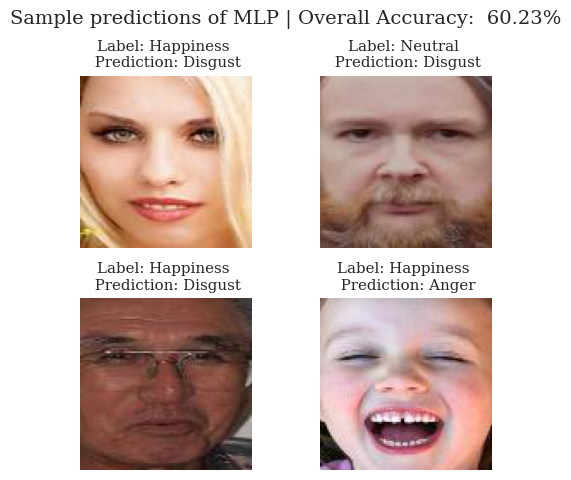

{'accuracy': 60.234680573663624,
 'f1_score': 0.6300598918416588,
 'precision': 0.6830171561900731,
 'recall': 0.6023468057366362}


In [3]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="MLP")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test CNN

INFO:test:Making predictions on test data
INFO:test:Loading test data
INFO:utils:test DataLoader using 6 workers for 3068 images
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


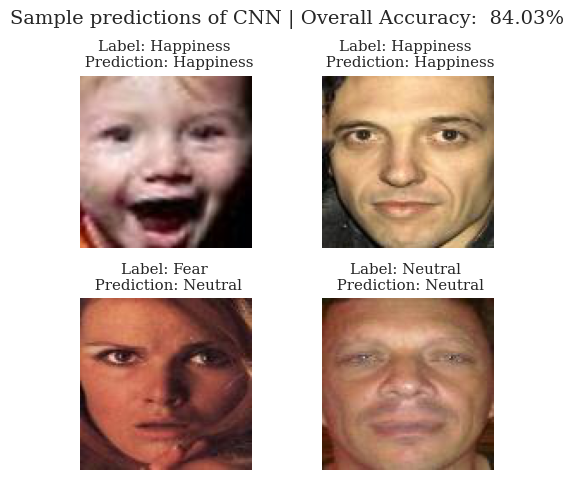

{'accuracy': 84.02868318122556,
 'f1_score': 0.8415593847696154,
 'precision': 0.8444714187085702,
 'recall': 0.8402868318122555}


In [4]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="CNN")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test CNN on Video

In [5]:
erv = test.EmotionRecognitionVideo(model_type="CNN")
frames = erv.predict_video(str(Path(VIDEOS_DIR).joinpath("downsampled_wine.m4v")))

INFO:test:Reading in video
INFO:test:Finding faces with min size 91 x 91
  0%|          | 0/385 [00:00<?, ?it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  0%|          | 1/385 [00:00<03:09,  2.03it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  1%|          | 2/385 [00:00<03:00,  2.12it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  1%|          | 3/385 [00:01<02:52,  2.22it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  1%|          | 4/385 [00:01<02:46,  2.29it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  1%|▏         | 5/385 [00:02<02:41,  2.35it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  2%|▏         | 6/385 [00:02<02:37,  2.40it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  2%|▏         | 7/385 [00:02<02:35,  2.43it/s]INFO:test:1 faces
INFO:test:0 profiles
INFO:test:1 objects
  2%|▏         | 8/385 [00:03<02:33,  2.46it/s]INFO:test:1 faces
INFO:test:0 profiles
I